## **Problem Statement:**

  We have a dataset with two prediictors i.e. cgpa and iq and our target is to determine whether the student get placed or not.

## **Steps to create an end to end ML Project**

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1. Load the dataset and initial dataset analysis:**

In [61]:
df = pd.read_csv("/content/placement.csv")

In [62]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [64]:
df.describe()

,Unnamed: 0,cgpa,iq,placement
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,0.000000,3.300000,37.000000,0.000000
25%,24.750000,5.075000,101.500000,0.000000
50%,49.500000,6.000000,127.500000,0.500000
75%,74.250000,6.900000,149.000000,1.000000
max,99.000000,8.500000,233.000000,1.000000


In [65]:
df.shape

(100, 4)

In [66]:
df.dtypes

,0
Unnamed: 0,int64
cgpa,float64
iq,float64
placement,int64


**2. Preprocessing:**

* The first column is unnecessary as id would be irrelevant.

In [67]:
#removing col1
df = df.iloc[:,1:]
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


**3. EDA**

<Axes: xlabel='cgpa', ylabel='iq'>

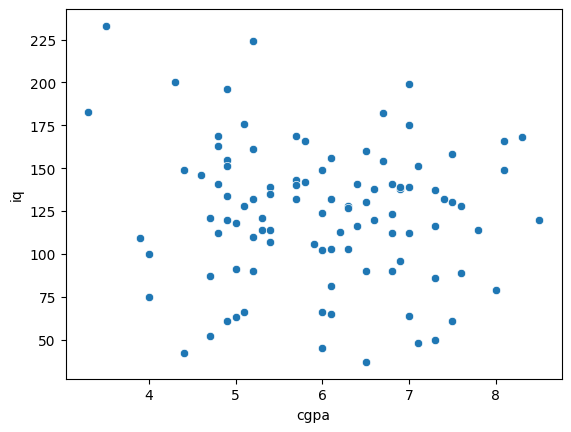

In [68]:
#creating scatter plot to determine the spread of our data
sns.scatterplot(x = "cgpa", y = "iq", data = df)

* Or we can use matplotlib as well for it:

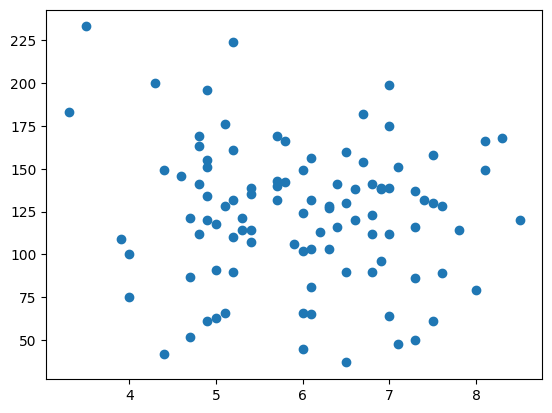

In [69]:
plt.scatter(x = "cgpa", y = "iq", data = df)

* Here we can use color as our target to distinguish the students based on wheteher they get placed or not.

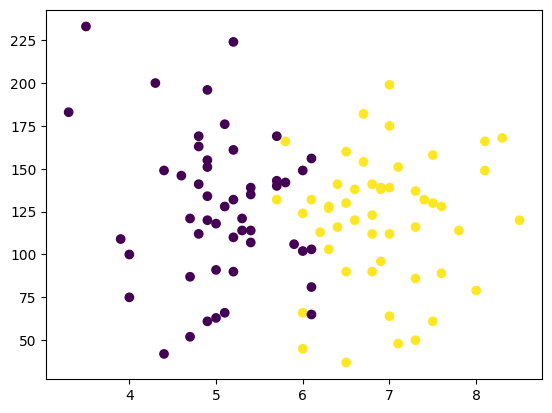

In [70]:
plt.scatter(df['cgpa'],df['iq'], c = df['placement'])

* *Observations:* Here the yellow determines the one that get plaaced and blue ones didn't

**4. Feature Selection:**

**5. Preparing dataset for model:**

In [71]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [72]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [73]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


**6. Train test split:**

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1)

* Creating four variables i.e x train, x test, y train, y test.
* test_size determines our distribution of data into training and testing dataset (0.1 values shows that 10% of our data is used for test and the remianing data will be used for training model)

Note : The data selected for either training or testing follows random choice

In [75]:
x_train

,cgpa,iq
99,6.2,113.0
5,7.1,48.0
80,4.9,196.0
98,6.3,103.0
78,6.1,81.0
...,...,...
17,3.3,183.0
4,5.8,142.0
35,6.8,90.0
84,5.7,169.0


In [76]:
y_train

,placement
99,1
5,1
80,0
98,1
78,0
...,...
17,0
4,0
35,1
84,0


In [77]:
x_test

,cgpa,iq
32,7.0,139.0
56,6.1,65.0
15,5.1,176.0
73,4.9,61.0
51,4.8,141.0
9,5.1,66.0
92,5.2,110.0
88,4.4,149.0
86,5.1,128.0
31,3.9,109.0


In [78]:
y_test

,placement
32,1
56,0
15,0
73,0
51,0
9,0
92,0
88,0
86,0
31,0


**7. Scaling values:**

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaler = StandardScaler()

In [81]:
#scaling x_train
x_train = scaler.fit_transform(x_train)

* This will scale the values in range : -1 <= value <= 1

In [82]:
x_train

array([[ 0.10313541, -0.29116538],
       [ 0.89875141, -1.9226955 ],
       [-1.0460877 ,  1.79217309],
       [ 0.19153719, -0.54217001],
       [ 0.01473363, -1.09438021],
       [ 0.01473363,  0.78815455],
       [-0.69248059, -0.26606491],
       [-0.95768593, -0.84337557],
       [ 1.07555496, -0.21586399],
       [-1.31129304,  0.53714992],
       [-0.60407881,  0.36144667],
       [-0.33887348,  0.18574343],
       [ 0.36834074,  0.88855641],
       [-0.33887348,  0.38654714],
       [-2.28371259,  2.72089024],
       [-0.78088237,  0.18574343],
       [-1.0460877 ,  0.66265224],
       [-1.13448948, -0.31626584],
       [ 1.25235852,  0.1355425 ],
       [ 0.81034963,  1.26506336],
       [ 0.27993896,  0.4116476 ],
       [-1.22289126, -0.09036167],
       [ 0.5451443 ,  0.73795363],
       [ 1.07555496, -1.87249457],
       [ 0.5451443 ,  1.4407666 ],
       [-1.0460877 , -0.11546213],
       [-1.57649837,  1.89257494],
       [ 0.36834074,  0.1355425 ],
       [-1.13448948,

In [83]:
#scaling x_test also
x_test = scaler.transform(x_test)

**8. Train Model:**

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
#Creating a logistic regressio object, that can access the function of class logistic regression.
clf = LogisticRegression()

* This fit function is actually used to train model.
* It takes two parameter as input i.e x_train and y_train.

In [86]:
#Model training.
clf.fit(x_train, y_train)

LogisticRegression()

**9. Evaluate Model / Model selection:**

* Model Evaluation : In this step we calculate the accuracy based on test data.
* Use function : predict(x_test)

In [87]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

* Here y_pred are tje values predicted by my model and the below y_test are the actual values.
* we can compare those values to determine the accuracyof model.

In [88]:
y_test

,placement
32,1
56,0
15,0
73,0
51,0
9,0
92,0
88,0
86,0
31,0


In [89]:
from sklearn.metrics import accuracy_score

In [90]:
accuracy_score(y_test, y_pred)

0.9

* Here 0.9 * 100 = 90 determines that our model is 90% accurate

Now as we used Logistic regression, and the model plots decision boundary i.e a line that divdes the data into two parts one with students that got placed and the other ones that did not.
We can visualize them using below code:

In [91]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

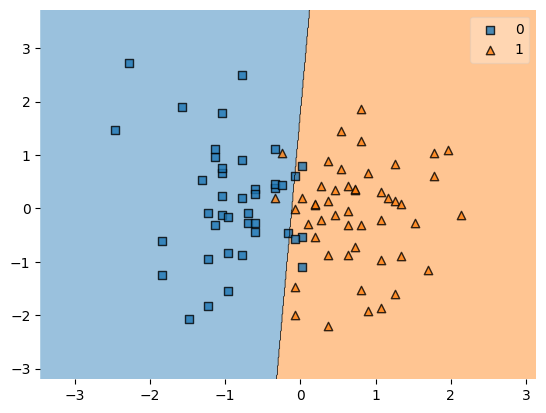

In [93]:
plot_decision_regions(x_train, y_train.values, clf = clf)

* If we  get satisfied with our model we don't do changes otherwise we can do changes in our model training.
* We can also try to train our model using multiple algorithm etc.

10. Deploy Model

In [94]:
import pickle

In [95]:
pickle.dump(clf, open('model.pkl', 'wb'))

* Now we can use this pickle file and create an app and can deploy it anywhere.